## Введение

Данная работа представляет собой аналитический отчёт о поиске талантливых игроков из топ-5 европейских футбольных лиг, проведших сезон 2022/2023 в клубах, не вошедших в топ-5 своих чемпионатов по итогам сезона. В качестве результатов работы будет представлен список игроков, имеющих хорошие статистические показатели по результатам сезона 2022/2023, и сравнение с положением дел этих игроков после окончания сезона 2023/2024.

## Подготовка к проведению анализа

Установим необходимые библиотеки для работы с данными:

In [367]:
import pandas as pd
import matplotlib.pyplot as plt

Передадим данные из csv-файла в датафрейм и сразу добавим расчётный столбец со средним количеством забитых мячей за игру:

In [187]:
df = pd.read_csv('2022-2023 Football Player Stats.csv', encoding='ISO-8859-1', sep=';')
df['Goals/90s'] = df['Goals']/df['90s']
df.insert(13, 'Goals/90s', df.pop('Goals/90s'))
df['Goals/90s'] = df['Goals/90s'].round(2)
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Goals/90s,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,0.06,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.0,0.06,0.0,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.0,0.00,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.00,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.0,0.05,0.0,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.0,0.00,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,0.00,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.0,0.00,0.0,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.0,0.00,8.14,0.93,1.05,47.1
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.05,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.70,26.20,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.0,0.05,6.60,0.50,0.50,50.0
4,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.00,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.0,0.00,0.0,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,

## Определение основных категорий игроков для анализа

Проверим, какие варианты позиций футболистов на поле представлены в датафрейме:

In [117]:
df.Pos.value_counts()

Pos
DF      825
MF      608
FW      409
FWMF    244
MFFW    208
GK      164
DFMF    101
MFDF     62
DFFW     38
FWDF     30
Name: count, dtype: int64

Исходя из списка выше, разделим игроков на 4 категории (т.к. позиции некоторых игроков в датасете представлены как смешанные, то  и в разных категориях они будут пересекаться между собой):  
  
1) Атакующие (FW, FWMF, MFFW, DFFW, FWDF)  
2) Игроки центра поля (MF, FWMF, MFFW, DFMF, MFDF)  
3) Оборонительные (DF, DFMF, MFDF, DFFW, FWDF)  
4) Голкиперы

## Определение ключевых статистических метрик для каждой категории

Выведем список всех столбцов датафрейма для оценки всех игровых показателей и определения наиболее важных из них на каждой позиции:

In [121]:
df.columns.values

array(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals', 'Goals/90s', 'Shots', 'SoT',
       'SoT%', 'G/Sh', 'G/SoT', 'ShoDist', 'ShoFK', 'ShoPK', 'PKatt',
       'PasTotCmp', 'PasTotAtt', 'PasTotCmp%', 'PasTotDist',
       'PasTotPrgDist', 'PasShoCmp', 'PasShoAtt', 'PasShoCmp%',
       'PasMedCmp', 'PasMedAtt', 'PasMedCmp%', 'PasLonCmp', 'PasLonAtt',
       'PasLonCmp%', 'Assists', 'PasAss', 'Pas3rd', 'PPA', 'CrsPA',
       'PasProg', 'PasAtt', 'PasLive', 'PasDead', 'PasFK', 'TB', 'Sw',
       'PasCrs', 'TI', 'CK', 'CkIn', 'CkOut', 'CkStr', 'PasCmp', 'PasOff',
       'PasBlocks', 'SCA', 'ScaPassLive', 'ScaPassDead', 'ScaDrib',
       'ScaSh', 'ScaFld', 'ScaDef', 'GCA', 'GcaPassLive', 'GcaPassDead',
       'GcaDrib', 'GcaSh', 'GcaFld', 'GcaDef', 'Tkl', 'TklWon',
       'TklDef3rd', 'TklMid3rd', 'TklAtt3rd', 'TklDri', 'TklDriAtt',
       'TklDri%', 'TklDriPast', 'Blocks', 'BlkSh', 'BlkPass', 'Int',
       'Tkl+Int', 'Clr', 'Er

Изучив все игровые показатели, в первую очередь, стоит отметить, что в датасете отсутствует достаточное количество показателей, с помощью которых можно было бы оценить уровень вратарской игры (за исключением некоторых, связанных с передачами и верховыми единоборствами). В связи с этим, оценка игры вратарей по данным из датасета производится не будет.  
  
Отобранные показатели:  
  
**Атакующие игроки:**  
1. Goals/90s - среднее количество голов за игру  
2. SoT% - процент ударов в створ от общего количества ударов  
3. G/SoT - процент голов от от общего количества ударов в створ  
4. PasTotCmp% - процент точных передач  
5. Assists - среднее количество голевых передач за игру  
6. CarPrgDist - среднее расстояние за игру, в ярдах, на которое игрок переместил мяч, контролируя его ногами, в сторону ворот соперника
7. SCA - среднее количество действий, приведших к удару, за игру  
8. GCA - среднее количество действий, приведших к голу, за игру
9. ToSuc% - процент успешных попыток дриблинга
10. ScaDrib - cреднее количество успешных обводок, приведших к удару по воротам, за игру
11. GcaDrib - cреднее количество успешных обводок, приведших к голу, за игру  
12. AerWon% - процент выигранных верховых единоборств
  
**Игроки центра поля:**
1. Goals/90s - среднее количество голов за игру
2. Assists - среднее количество голевых передач за игру  
3. PasTotCmp% - процент точных передач  
4. PasShoCmp% - процент точных передач на расстоянии от 10 до 15 ярдов  
5. PasMedCmp% - процент точных передач на расстоянии от 15 до 30 ярдов  
6. PasLonCmp% - процент точных передач на расстоянии более 30 ярдов  
7. Pas3rd - среднее количество передач в финальную треть поля за игру  
8. PasAss - среднее количество передач, приведших к удару за игру  
9. PasProg - среднее количество передач за игру, перемещающих мяч к воротам соперника не менее чем на 10 ярдов от его самой дальней точки за последние шесть передач или любой завершенный пас в штрафную площадь
10. PasTotPrgDist - среднее расстояние в ярдах передачи, выполненной в сторону ворот соперника.
11. CarPrgDist - среднее расстояние за игру, в ярдах, на которое игрок переместил мяч, контролируя его ногами, в сторону ворот соперника  
12. SCA - среднее количество действий, приведших к удару, за игру  
13. GCA - среднее количество действий, приведших к голу, за игру  
14. TklWon - среднее количество успешных отборов мяча за игру  
15. Int - среднее количество перехватов мяча за игру

**Оборонительные игроки:**  
1. TklWon - среднее количество успешных отборов мяча за игру  
2. TklDriPast - среднее количество допущенных обводок за игру  
3. TklDri% - процент попыток отбора мяча от всех попыток дриблинга соперником  
4. Int - среднее количество перехватов мяча за игру  
5. Clr - среднее количество выносов мяча за игру  
6. Err - среднее количество ошибок за игру, приведших к удару по воротам  
7. BlkSh - среднее количество заблокированных ударов за игру  
8. AerWon% - процент выигранных верховых единоборств  
9. PasTotCmp% - процент точных передач  
10. PasProg - среднее количество передач за игру, перемещающих мяч к воротам соперника не менее чем на 10 ярдов от его самой дальней точки за последние шесть передач или любой завершенный пас в штрафную площадь  

## Условия выявления "таланта" футболиста

Уровень "отбора таланта" для каждого статистического показателя будет определён следующим образом: 
1. Для каждой позиции будут отобраны соответствующие им игроки из топ-5 команд каждого из чемпионатов, проведшие на поле минимум 900 минут (10 матчей), на высокий уровень игры которых мы сможем ориентироваться для выявления перспективных игроков.
2. Для каждого статистического показателя будут взяты средние показатели выбранных игроков.
3. Из оставшихся игроков "талантливым" по какому-либо показателю будет считаться тот футболист, который за сезон провёл на поле не менее 450 минут и чьи показатели будут превышать рассчитанные средние значения.
4. За каждый показатель, превышающий рассчитанное по нему среднее значение, счётчик каждой из категорий начисляет футболисту балл. Соответственно, чем выше показатель счётчика, тем большее кол-во показателей, превышающих средние значения, имеет футболист.

## Сводка по командам, показатели футболистов которых будут использованы для расчёта "уровня отбора"

Топ-5 команд из топ-5 европейских чемпионатов по результатам сезона 2022/2023:  

**Англия:**  
1. Манчестер Сити  
2. Арсенал  
3. Манчестер Юнайтед  
4. Ньюкасл Юнайтед  
5. Ливерпуль  

**Испания:**  
1. Барселона  
2. Реал Мадрид  
3. Атлетико Мадрид  
4. Реал Сосьедад  
5. Вилльяреал  

**Германия:**  
1. Бавария  
2. Боруссия Дортмунд  
3. РБ Лейпциг  
4. Унион  
5. Фрайбург  

**Италия:**  
1. Наполи  
2. Лацио  
3. Интер  
4. Милан  
5. Аталанта  

**Франция:**  
1. ПСЖ  
2. Ланс  
3. Марсель  
4. Ренн  
5. Лилль  

Выведем список всех игроков этих команд, проведших на полее более 900 минут:

In [127]:
list_of_teams = ['Manchester City', 'Arsenal', 'Manchester Utd', 'Newcastle Utd', 'Liverpool', 'Barcelona', 'Real Madrid', 'Atlético Madrid', 'Real Sociedad', 'Villarreal', 'Bayern Munich', 'Dortmund', 'RB Leipzig', 'Union Berlin', 'Freiburg', 'Napoli', 'Lazio', 'Inter', 'Milan', 'Atalanta', 'Paris S-G', 'Lens', 'Marseille', 'Rennes', 'Lille']
top_5 = df[df['Squad'].isin(list_of_teams)&(df['Min'] > 900)]
top_5

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Goals/90s,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
3,4,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,20.0,1,0.050,0.60,0.15,25.0,0.08,0.33,20.3,0.00,0.0,0.0,59.5,64.9,91.6,946.3,226.9,29.6,31.8,93.2,24.7,26.2,94.3,3.35,4.30,77.9,0.00,0.50,6.00,0.55,0.10,5.60,64.9,63.1,1.40,1.30,0.05,0.20,0.35,0.10,0.00,0.00,0.00,0.00,59.5,0.35,0.40,1.60,1.35,0.00,0.10,0.10,0.00,0.05,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.50,0.80,0.55,0.85,0.10,0.85,1.30,65.4,0.45,1.30,0.35,0.95,1.10,2.60,0.80,0.00,73.3,2.10,12.00,49.6,12.20,0.70,73.3,1.25,0.70,56.0,0.40,32.0,61.0,316.9,117.5,1.25,1.95,0.15,1.35,1.30,56.5,1.70,0.15,0.0,0.0,2.45,1.35,0.00,0.35,0.80,0.0,0.00,0.05,6.60,0.50,0.50,50.0
11,12,Francesco Acerbi,ITA,DF,Inter,Serie A,35,1988,14,12,1110,12.3,0,0.000,0.49,0.00,0.0,0.00,0.00,17.8,0.00,0.0,0.0,51.7,58.9,87.7,975.9,312.0,18.9,20.5,92.1,25.8,28.6,90.1,6.02,8.13,74.0,0.08,0.49,3.09,0.24,0.00,3.58,58.9,55.7,3.17,2.11,0.00,0.73,0.24,0.57,0.00,0.00,0.00,0.00,51.7,0.08,0.16,0.98,0.81,0.08,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.30,0.57,1.14,0.16,0.00,0.81,0.98,83.3,0.16,0.57,0.33,0.24,0.98,2.28,3.33,0.00,67.2,8.21,30.40,34.4,2.85,0.49,67.2,0.16,0.00,0.0,0.08,50.0,36.7,184.3,96.6,1.06,0.89,0.08,0.57,0.24,44.2,0.24,0.24,0.0,0.0,0.73,0.73,0.08,0.24,0.57,0.0,0.00,0.00,4.96,2.76,1.63,63.0
42,43,Manuel Akanji,SUI,DF,Manchester City,Premier League,27,1995,15,14,1286,14.3,0,0.000,0.77,0.14,18.2,0.00,0.00,16.4,0.00,0.0,0.0,76.2,80.9,94.2,1319.8,411.2,33.4,34.4,97.2,37.0,38.5,96.2,4.76,6.36,74.7,0.07,0.28,5.17,0.07,0.07,4.76,80.9,79.4,1.47,0.84,0.00,0.49,0.21,0.63,0.00,0.00,0.00,0.00,76.2,0.00,0.14,1.26,1.19,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,1.54,1.05,0.56,0.77,0.21,1.12,1.47,76.2,0.35,1.33,0.42,0.91,0.77,2.31,1.19,0.00,88.6,5.17,32.70,49.7,6.43,1.40,88.6,0.28,0.21,75.0,0.07,25.0,63.6,387.1,239.9,1.26,1.61,0.00,0.49,0.14,69.2,0.56,0.07,0.0,0.0,0.91,0.49,0.00,0.21,1.05,0.0,0.00,0.00,5.38,0.84,1.40,37.5
43,44,Nathan Aké,NED,DF,Manchester City,Premier League,27,1995,15,13,1156,12.8,0,0.000,0.31,0.00,0.0,0.00,0.00,10.5,0.00,0.0,0.0,84.2,92.0,91.5,1384.6,497.4,39.7,41.8,95.0,39.7,42.3,93.7,3.75,5.55,67.6,0.00,0.39,7.58,0.39,0.00,7.34,92.0,85.9,5.94,1.80,0.08,0.47,0.39,4.14,0.00,0.00,0.00,0.00,84.2,0.16,0.94,1.17,0.94,0.08,0.00,0.16,0.00,0.00,0.16,0.16,0.00,0.0,0.00,0.0,0.0,1.25,0.55,0.63,0.55,0.08,0.55,0.78,70.0,0.23,1.02,0.47,0.55,1.02,2.27,1.64,0.00,98.4,4.53,31.80,56.8,10.20,1.56,98.4,0.23,0.16,66.7,0.08,33.3,63.8,298.3,188.8,1.09,0.70,0.16,0.78,0.00,76.2,1.17,0.00,0.0,0.0,0.70,0.70,0.08,0.39,0.55,0.0,0.00,0.00,5.00,1.72,1.33,56.4
49,50,David Alaba,AUT,DF,Real Madrid,La Liga,30,1992,17,15,1365,15.2,1,0.066,0.59,0.07,11.1,0.11,1.00,20.7,0.26,0.0,0.0,50.2,56.8,88.3,743.6,263.6,28.6,29.9,95.8,16.8,18.9,88.9,2.70,4.67,57.7,0.20,0.99,3.55,0.46,0.20,3.49,56.8,51.9,4.61,2.24,0.13,0.13,1.25,1.97,0.13,0.13,0.00,0.00,50.2,0.33,0.53,1.58,1.32,0.20,0.00,0.07,0.00,0.00,0.26,0.20,0.00,0.0,0.07,0.0,0.0,0.66,0.53,0.26,0.20,0.20,0.39,0.72,54.5,0.33,0.79,0.53,0.26,0.72,1.38,1.64,0.07,61.8,6.38,24.70,26.2,11.30,0.86,61.8,0.13,0.07,50.0,0.07,50.0,38.0,166.8,99.9,0.72,1.18,0.07,0.46,0.20,44.6,2.63,0.20,0.0,0.0,0.46,

Далее, в зависимости от позиции, рассчитаем средние значения показателей перечисленных выше игроков:

## Расчёт "уровней отбора" для каждой категории

**Атакующие игроки**

In [348]:
att_positions = ['FW', 'FWMF', 'MFFW', 'FWDF', 'DFFW']
top_5_att = top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'Goals/90s', 'SoT%', 'G/SoT', 'PasTotCmp%', 'Assists', 'CarPrgDist', 'SCA', 'GCA', 'ToSuc%', 'ScaDrib', 'GcaDrib', 'AerWon%']]
top_5_att = top_5_att[top_5_att['Pos'].isin(att_positions)]
top_5_att.loc[len(top_5_att)] = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', top_5_att['Goals/90s'].mean(), top_5_att['SoT%'].mean(), top_5_att['G/SoT'].mean(), top_5_att['PasTotCmp%'].mean(), top_5_att['Assists'].mean(), top_5_att['CarPrgDist'].mean(), top_5_att['SCA'].mean(), top_5_att['GCA'].mean(), top_5_att['ToSuc%'].mean(), top_5_att['ScaDrib'].mean(), top_5_att['GcaDrib'].mean(), top_5_att['AerWon%'].mean()]
top_5_att = top_5_att.round(2)
top_5_att

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals/90s,SoT%,G/SoT,PasTotCmp%,Assists,CarPrgDist,SCA,GCA,ToSuc%,ScaDrib,GcaDrib,AerWon%
72,Miguel Almirón,PAR,FW,Newcastle Utd,Premier League,29,22,22,1816,20.2,0.50,31.9,0.67,82.50,0.05,85.60,3.07,0.45,37.30,0.35,0.20,30.80
93,Felipe Anderson,BRA,FW,Lazio,Serie A,29,22,20,1687,18.7,0.32,54.5,0.50,76.30,0.11,77.30,3.05,0.48,50.00,0.32,0.16,34.80
104,Antony,BRA,FW,Manchester Utd,Premier League,22,12,11,908,10.1,0.30,42.4,0.21,77.20,0.00,125.10,2.97,0.10,32.30,0.10,0.00,27.30
164,Alex Baena,ESP,MFFW,Villarreal,La Liga,21,18,10,1039,11.5,0.35,38.2,0.31,77.50,0.09,82.50,3.48,0.35,45.20,0.35,0.00,0.00
186,Jonathan Bamba,FRA,FW,Lille,Ligue 1,26,18,16,1454,16.2,0.25,37.5,0.27,78.40,0.19,127.00,4.20,0.49,30.90,0.12,0.00,39.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,Federico Valverde,URU,FWMF,Real Madrid,La Liga,24,20,17,1529,17.0,0.35,36.6,0.40,87.90,0.12,123.50,3.24,0.59,72.00,0.12,0.06,77.30
2600,Timo Werner,GER,FWMF,RB Leipzig,Bundesliga,26,14,11,1009,11.2,0.45,40.6,0.38,70.90,0.09,59.50,1.79,0.27,40.00,0.27,0.00,28.60
2611,Callum Wilson,ENG,FW,Newcastle Utd,Premier League,30,16,14,1128,12.5,0.56,41.5,0.35,71.00,0.24,37.20,1.84,0.40,30.00,0.16,0.00,30.40
2642,Mattia Zaccagni,ITA,FWMF,Lazio,Serie A,27,20,20,1607,17.9,0.45,42.1,0.44,79.40,0.22,105.60,2.79,0.39,37.70,0.28,0.00,25.00


**Игроки центра поля**

In [163]:
mid_positions = ['MF', 'FWMF', 'MFFW', 'MFDF', 'DFMF']
top_5_mid = top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'Goals/90s', 'Assists', 'PasTotCmp%', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'Pas3rd', 'PasAss', 'PasProg', 'PasTotPrgDist', 'CarPrgDist', 'SCA', 'GCA', 'TklWon', 'Int']]
top_5_mid = top_5_mid[top_5_mid['Pos'].isin(mid_positions)]
top_5_mid.loc[len(top_5_mid)] = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', top_5_mid['Goals/90s'].mean(), top_5_mid['Assists'].mean(), top_5_mid['PasTotCmp%'].mean(), top_5_mid['PasShoCmp%'].mean(), top_5_mid['PasMedCmp%'].mean(), top_5_mid['PasLonCmp%'].mean(), top_5_mid['Pas3rd'].mean(), top_5_mid['PasAss'].mean(), top_5_mid['PasProg'].mean(), top_5_mid['PasTotPrgDist'].mean(), top_5_mid['CarPrgDist'].mean(), top_5_mid['SCA'].mean(), top_5_mid['GCA'].mean(), top_5_mid['TklWon'].mean(), top_5_mid['Int'].mean()]
top_5_mid = top_5_mid.round(2)
top_5_mid

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals/90s,Assists,PasTotCmp%,PasShoCmp%,PasMedCmp%,PasLonCmp%,Pas3rd,PasAss,PasProg,PasTotPrgDist,CarPrgDist,SCA,GCA,TklWon,Int
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,20,20,1799,20.0,0.05,0.00,91.60,93.20,94.30,77.90,6.00,0.50,5.60,226.90,117.50,1.60,0.00,0.80,1.10
53,Luis Alberto,ESP,MF,Lazio,Serie A,30,19,11,1053,11.7,0.34,0.26,80.00,90.20,83.90,48.10,6.07,2.14,9.23,302.90,106.80,3.25,0.51,0.94,0.34
56,Thiago Alcántara,ESP,MF,Liverpool,Premier League,31,14,14,1154,12.8,0.00,0.00,85.90,92.70,87.90,79.10,7.42,1.33,8.36,348.10,120.40,3.05,0.16,1.80,1.41
94,Benjamin André,FRA,MF,Lille,Ligue 1,32,20,20,1756,19.5,0.05,0.05,84.30,88.00,88.40,74.30,8.51,0.77,9.08,329.40,121.50,2.46,0.26,2.31,1.44
164,Alex Baena,ESP,MFFW,Villarreal,La Liga,21,18,10,1039,11.5,0.35,0.09,77.50,88.50,81.60,64.70,2.61,1.65,4.52,108.30,82.50,3.48,0.35,0.78,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,Andre-Frank Zambo Anguissa,CMR,MF,Napoli,Serie A,27,19,19,1594,17.7,0.11,0.23,87.10,92.40,88.80,62.30,5.08,0.90,5.59,191.60,92.80,2.37,0.34,1.19,1.19
2671,Piotr Zieli?ski,POL,MF,Napoli,Serie A,28,21,16,1314,14.6,0.20,0.41,82.70,92.10,81.80,59.10,4.38,2.88,4.73,191.80,93.90,4.73,0.55,0.41,0.82
2683,Martín Zubimendi,ESP,MF,Real Sociedad,La Liga,24,19,18,1601,17.8,0.06,0.11,84.20,89.00,89.50,61.40,4.94,0.51,5.45,251.10,107.80,1.29,0.22,1.07,0.96
2686,Martin Ødegaard,NOR,MF,Arsenal,Premier League,24,20,20,1684,18.7,0.43,0.27,79.10,87.40,79.80,64.50,3.53,2.30,7.54,181.20,83.90,5.08,0.64,0.70,0.16


**Оборонительные игроки**

In [165]:
def_positions = ['DF', 'FWDF', 'DFFW', 'MFDF', 'DFMF']
top_5_def = top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'TklWon', 'TklDriPast', 'TklDri%', 'Int', 'Clr', 'Err', 'BlkSh', 'AerWon%', 'PasTotCmp%', 'PasProg']]
top_5_def = top_5_def[top_5_def['Pos'].isin(def_positions)]
top_5_def.loc[len(top_5_def)] = ['-', '-', '-', '-', '-', '-', '-', '-', '-', '-', top_5_def['TklWon'].mean(), top_5_def['TklDriPast'].mean(), top_5_def['TklDri%'].mean(), top_5_def['Int'].mean(), top_5_def['Clr'].mean(), top_5_def['Err'].mean(), top_5_def['BlkSh'].mean(), top_5_def['AerWon%'].mean(), top_5_def['PasTotCmp%'].mean(), top_5_def['PasProg'].mean()]
top_5_def = top_5_def.round(2)
top_5_def

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,TklWon,TklDriPast,TklDri%,Int,Clr,Err,BlkSh,AerWon%,PasTotCmp%,PasProg
11,Francesco Acerbi,ITA,DF,Inter,Serie A,35,14,12,1110,12.3,0.57,0.16,83.3,0.98,3.33,0.00,0.33,63.00,87.70,3.58
42,Manuel Akanji,SUI,DF,Manchester City,Premier League,27,15,14,1286,14.3,1.05,0.35,76.2,0.77,1.19,0.00,0.42,37.50,94.20,4.76
43,Nathan Aké,NED,DF,Manchester City,Premier League,27,15,13,1156,12.8,0.55,0.23,70.0,1.02,1.64,0.00,0.47,56.40,91.50,7.34
49,David Alaba,AUT,DF,Real Madrid,La Liga,30,17,15,1365,15.2,0.53,0.33,54.5,0.72,1.64,0.07,0.53,45.50,88.30,3.49
52,Jordi Alba,ESP,DF,Barcelona,La Liga,33,14,9,931,10.3,1.26,0.97,52.4,0.49,1.36,0.00,0.29,37.50,85.20,10.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2601,Ben White,ENG,DF,Arsenal,Premier League,25,21,21,1683,18.7,1.28,0.64,70.7,0.64,2.51,0.00,0.37,48.80,83.60,8.13
2620,Axel Witsel,BEL,DFMF,Atlético Madrid,La Liga,34,17,14,1251,13.9,0.58,0.22,70.0,0.86,3.31,0.00,0.50,56.40,93.00,3.31
2673,Oleksandr Zinchenko,UKR,DF,Arsenal,Premier League,26,14,13,1081,12.0,0.75,0.92,50.0,0.75,1.58,0.08,0.00,75.00,87.20,10.20
2682,Igor Zubeldia,ESP,DF,Real Sociedad,La Liga,25,16,14,1257,14.0,0.86,0.21,80.0,0.79,4.07,0.00,0.79,56.00,86.90,3.36


## Список футболистов, не выступавших в сезоне 2022/2023 в топ-5 клубах перечисленных чемпионатов и сыгравших на поле не менее 5 матчей (450 минут)

Далее выведем список игроков, проведших сезон не в клубах топ-5 чемпионатов и сыгравших на поле не менее 5 матчей (450 минут)

In [354]:
non_top_5 = df[~df['Squad'].isin(list_of_teams)]
non_top_5 = non_top_5[(non_top_5['Min'] > 450)]
non_top_5 = non_top_5.reset_index(drop=True)
non_top_5

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals,Goals/90s,Shots,SoT,SoT%,G/Sh,G/SoT,ShoDist,ShoFK,ShoPK,PKatt,PasTotCmp,PasTotAtt,PasTotCmp%,PasTotDist,PasTotPrgDist,PasShoCmp,PasShoAtt,PasShoCmp%,PasMedCmp,PasMedAtt,PasMedCmp%,PasLonCmp,PasLonAtt,PasLonCmp%,Assists,PasAss,Pas3rd,PPA,CrsPA,PasProg,PasAtt,PasLive,PasDead,PasFK,TB,Sw,PasCrs,TI,CK,CkIn,CkOut,CkStr,PasCmp,PasOff,PasBlocks,SCA,ScaPassLive,ScaPassDead,ScaDrib,ScaSh,ScaFld,ScaDef,GCA,GcaPassLive,GcaPassDead,GcaDrib,GcaSh,GcaFld,GcaDef,Tkl,TklWon,TklDef3rd,TklMid3rd,TklAtt3rd,TklDri,TklDriAtt,TklDri%,TklDriPast,Blocks,BlkSh,BlkPass,Int,Tkl+Int,Clr,Err,Touches,TouDefPen,TouDef3rd,TouMid3rd,TouAtt3rd,TouAttPen,TouLive,ToAtt,ToSuc,ToSuc%,ToTkl,ToTkl%,Carries,CarTotDist,CarPrgDist,CarProg,Car3rd,CPA,CarMis,CarDis,Rec,RecProg,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,17.7,1,0.06,1.53,0.28,18.5,0.04,0.20,19.0,0.11,0.0,0.0,23.2,31.0,74.9,293.0,85.7,13.3,16.2,81.9,5.93,7.74,76.6,0.90,2.37,38.1,0.11,1.75,1.75,0.45,0.11,3.22,31.0,28.1,2.88,0.96,0.17,0.00,2.54,0.23,1.47,0.68,0.62,0.06,23.2,0.00,0.85,3.62,2.37,0.56,0.23,0.11,0.28,0.06,0.28,0.17,0.0,0.00,0.06,0.00,0.06,1.64,0.51,0.45,0.90,0.28,0.51,1.47,34.6,0.96,1.69,0.11,1.58,0.06,1.69,0.28,0.06,44.0,0.40,4.35,19.0,21.50,2.49,44.0,3.73,1.19,31.8,1.75,47.0,26.7,136.1,56.6,1.53,1.07,0.40,2.60,3.11,30.2,5.65,0.11,0.0,0.0,0.62,2.26,0.17,2.54,0.51,0.0,0.00,0.0,4.86,0.34,1.19,22.2
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,22.0,0,0.00,0.86,0.05,5.3,0.00,0.00,13.5,0.00,0.0,0.0,38.5,47.2,81.5,751.5,318.5,10.9,12.9,84.5,23.20,25.70,90.1,3.77,7.00,53.9,0.05,0.27,2.91,0.09,0.00,4.50,47.2,43.3,3.73,3.32,0.00,0.55,0.18,0.09,0.00,0.00,0.00,0.00,38.5,0.23,0.59,1.14,0.86,0.00,0.00,0.18,0.00,0.09,0.18,0.14,0.0,0.00,0.05,0.00,0.00,2.50,1.59,1.45,1.00,0.05,1.32,1.68,78.4,0.36,2.23,0.77,1.45,2.00,4.50,2.91,0.05,59.2,6.23,27.50,29.5,2.73,1.09,59.2,0.68,0.32,46.7,0.36,53.3,40.0,234.2,125.0,0.55,0.23,0.09,0.73,0.68,34.5,0.23,0.09,0.0,0.0,1.32,0.50,0.05,0.18,1.59,0.0,0.00,0.0,6.64,2.18,1.23,64.0
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,8.6,0,0.00,1.05,0.35,33.3,0.00,0.00,19.2,0.00,0.0,0.0,40.0,49.5,80.8,676.0,188.1,18.5,22.0,84.1,15.50,18.70,82.6,4.42,5.93,74.5,0.00,1.51,3.95,1.74,0.35,6.40,49.5,48.1,1.16,0.35,0.12,0.23,1.05,0.81,0.00,0.00,0.00,0.00,40.0,0.23,1.16,2.67,2.44,0.00,0.00,0.12,0.00,0.12,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2.91,1.40,1.28,1.40,0.23,1.63,2.67,60.9,1.05,1.51,0.12,1.40,0.93,3.84,0.93,0.00,62.6,0.93,11.40,36.0,17.40,1.16,62.6,3.84,2.09,54.5,1.51,39.4,48.5,298.5,151.0,2.56,2.56,0.47,2.09,1.05,43.4,5.93,0.12,0.0,0.0,1.74,1.28,0.00,1.05,1.40,0.0,0.00,0.0,8.14,0.93,1.05,47.1
3,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,12.9,0,0.00,0.31,0.00,0.0,0.00,0.00,23.9,0.00,0.0,0.0,37.9,43.4,87.3,613.6,224.7,17.9,19.4,92.4,15.70,17.80,88.6,2.64,3.95,66.7,0.08,0.62,3.88,0.39,0.00,5.04,43.4,42.6,0.78,0.78,0.39,0.16,0.23,0.00,0.00,0.00,0.00,0.00,37.9,0.08,0.31,1.24,1.01,0.08,0.00,0.08,0.00,0.08,0.08,0.08,0.0,0.00,0.00,0.00,0.00,3.80,2.02,2.64,1.16,0.00,1.32,3.26,40.5,1.94,1.40,0.23,1.16,1.16,4.96,1.55,0.00,54.7,3.26,19.20,31.4,4.88,0.23,54.7,0.93,0.54,58.3,0.31,33.3,41.0,174.3,72.7,0.47,0.93,0.00,1.32,0.78,36.4,0.47,0.16,0.0,0.0,0.93,1.01,0.00,0.23,2.02,0.0,0.00,0.0,6.51,0.31,0.39,44.4
4,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,1507,16.7,5,0.30,2.75,1.02,37.0,0.11,0.29,18.1,0.00,0.0,0.0,17.6,25.3,69.7,219.5,49.6,11.7,14.9,79.0,4.43,6.17,71.8,0.24,0.84,28.6,0.24,0.54,0.78,0.42,0.06,1.80,25.3,24.3,0.84,0.06,0.06,0.00,0.96,0.78,0.00,0.00,0.00,0.00,17.6,0.18,1.56,2.34,1.32,0.00,0.18,0.36,0.42,0.06,0.24,0.12,0.0,0.06,0.00,0.06,0.00,1.14,0.72,0.54,0.30,0.30,0.30,1.32,22.7,1.02,0.54,0.06,0.48,0.84,1.98,0.66,0.00,38.0,0.96,5.45,14.6,18.70,4.97,38.0,3.17,1.02,32.1,1.86,58.5,28.6,177.7,74.7,3.05,1.08,1.14,2.57,0.96,27.1,9.52,0.18,0.0,0.0,1.56,1.80,0.72,0.

## Список "талантливых" футболистов с высоким атакующим потенциалом, прошедших уровень отбора по 8/12 показателям:

In [356]:
non_top_5['att_counter'] = 0
for i in range(len(non_top_5)):
    counter = 0
    if non_top_5.loc[i, 'Goals/90s'] >= top_5_att.loc[79, 'Goals/90s']:
        counter += 1
    if non_top_5.loc[i, 'SoT%'] >= top_5_att.loc[79, 'SoT%']:
        counter += 1
    if non_top_5.loc[i, 'G/SoT'] >= top_5_att.loc[79, 'G/SoT']:
        counter += 1
    if non_top_5.loc[i, 'PasTotCmp%'] >= top_5_att.loc[79, 'PasTotCmp%']:
        counter += 1
    if non_top_5.loc[i, 'Assists'] >= top_5_att.loc[79, 'Assists']:
        counter += 1
    if non_top_5.loc[i, 'CarPrgDist'] >= top_5_att.loc[79, 'CarPrgDist']:
        counter += 1
    if non_top_5.loc[i, 'SCA'] >= top_5_att.loc[79, 'SCA']:
        counter += 1
    if non_top_5.loc[i, 'GCA'] >= top_5_att.loc[79, 'GCA']:
        counter += 1
    if non_top_5.loc[i, 'ToSuc%'] >= top_5_att.loc[79, 'ToSuc%']:
        counter += 1
    if non_top_5.loc[i, 'ScaDrib'] >= top_5_att.loc[79, 'ScaDrib']:
        counter += 1
    if non_top_5.loc[i, 'GcaDrib'] >= top_5_att.loc[79, 'GcaDrib']:
        counter += 1
    if non_top_5.loc[i, 'AerWon%'] >= top_5_att.loc[79, 'AerWon%']:
        counter += 1
    non_top_5.loc[i, 'att_counter'] = counter
att_talents = non_top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'Goals/90s', 'SoT%', 'G/SoT', 'PasTotCmp%', 'Assists', 'CarPrgDist', 'SCA', 'GCA', 'ToSuc%', 'ScaDrib', 'GcaDrib', 'AerWon%', 'att_counter']]
att_talents = att_talents[att_talents['att_counter'] >= 8]
att_talents = att_talents.reset_index(drop=True)
att_talents.loc[len(att_talents)] = top_5_att.loc[len(top_5_att)-1]
att_talents

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals/90s,SoT%,G/SoT,PasTotCmp%,Assists,CarPrgDist,SCA,GCA,ToSuc%,ScaDrib,GcaDrib,AerWon%,att_counter
0,Nadiem Amiri,GER,MFFW,Leverkusen,Bundesliga,26,15,5,636,7.1,0.28,41.7,0.40,83.80,0.14,89.00,3.10,0.56,42.90,0.42,0.14,0.00,8.0
1,Youcef Belaïli,ALG,MFFW,Ajaccio,Ligue 1,30,12,10,780,8.7,0.57,31.6,0.17,72.10,0.34,94.60,3.79,1.03,41.70,0.23,0.23,41.70,8.0
2,Sofiane Boufal,MAR,FWMF,Angers,Ligue 1,29,13,9,834,9.3,0.43,42.9,0.22,76.00,0.32,166.00,5.59,0.65,45.50,0.43,0.00,10.00,8.0
3,Paulo Dybala,ARG,MFFW,Roma,Serie A,29,16,15,1179,13.1,0.61,35.1,0.46,77.80,0.46,91.80,5.11,0.53,40.50,0.08,0.00,18.20,8.0
4,Chidera Ejuke,NGA,FWMF,Hertha BSC,Bundesliga,25,15,9,790,8.8,0.00,23.8,0.00,79.20,0.34,114.00,3.86,0.57,41.90,0.57,0.00,66.70,8.0
5,Nabil Fekir,FRA,MF,Betis,La Liga,29,13,10,781,8.7,0.23,21.1,0.25,78.50,0.23,99.30,5.40,0.57,37.10,0.34,0.11,43.80,8.0
6,Jeremie Frimpong,NED,DFMF,Leverkusen,Bundesliga,22,20,19,1614,17.9,0.28,45.5,0.50,78.10,0.22,160.80,3.18,0.39,45.80,0.50,0.06,34.60,8.0
7,Aleksandr Golovin,RUS,MFFW,Monaco,Ligue 1,26,22,18,1576,17.5,0.29,47.2,0.29,70.20,0.34,125.80,4.91,0.63,48.60,0.34,0.11,40.00,9.0
8,Randal Kolo Muani,FRA,FW,Eint Frankfurt,Bundesliga,24,18,17,1442,16.0,0.56,45.9,0.47,63.20,0.63,74.60,3.88,1.06,39.00,0.88,0.19,40.50,9.0
9,Dejan Kulusevski,SWE,MFFW,Tottenham,Premier League,22,15,13,1132,12.6,0.16,28.6,0.33,76.20,0.40,117.40,4.13,0.63,37.10,0.63,0.08,50.00,8.0


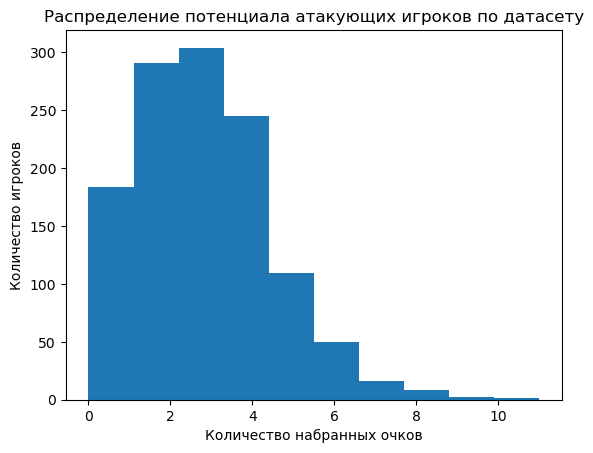

In [464]:
non_top_5['att_counter'].plot(kind = 'hist')
plt.title('Распределение потенциала атакующих игроков по датасету')
plt.xlabel('Количество набранных очков')
plt.ylabel('Количество игроков')
plt.show()

## Список "талантливых" футболистов с высоким уровней показателей, характерных для игроков центра поля, прошедших уровень отбора по 10/15 показателям:

In [585]:
non_top_5['mid_counter'] = 0
for i in range(len(non_top_5)):
    counter = 0
    if non_top_5.loc[i, 'Goals/90s'] >= top_5_mid.loc[111, 'Goals/90s']:
        counter += 1
    if non_top_5.loc[i, 'Assists'] >= top_5_mid.loc[111, 'Assists']:
        counter += 1
    if non_top_5.loc[i, 'PasTotCmp%'] >= top_5_mid.loc[111, 'PasTotCmp%']:
        counter += 1
    if non_top_5.loc[i, 'PasShoCmp%'] >= top_5_mid.loc[111, 'PasShoCmp%']:
        counter += 1
    if non_top_5.loc[i, 'PasMedCmp%'] >= top_5_mid.loc[111, 'PasMedCmp%']:
        counter += 1
    if non_top_5.loc[i, 'PasLonCmp%'] >= top_5_mid.loc[111, 'PasLonCmp%']:
        counter += 1
    if non_top_5.loc[i, 'Pas3rd'] >= top_5_mid.loc[111, 'Pas3rd']:
        counter += 1
    if non_top_5.loc[i, 'PasAss'] >= top_5_mid.loc[111, 'PasAss']:
        counter += 1
    if non_top_5.loc[i, 'PasProg'] >= top_5_mid.loc[111, 'PasProg']:
        counter += 1
    if non_top_5.loc[i, 'PasTotPrgDist'] >= top_5_mid.loc[111, 'PasTotPrgDist']:
        counter += 1
    if non_top_5.loc[i, 'CarPrgDist'] >= top_5_mid.loc[111, 'CarPrgDist']:
        counter += 1
    if non_top_5.loc[i, 'SCA'] >= top_5_mid.loc[111, 'SCA']:
        counter += 1
    if non_top_5.loc[i, 'GCA'] >= top_5_mid.loc[111, 'GCA']:
        counter += 1
    if non_top_5.loc[i, 'TklWon'] >= top_5_mid.loc[111, 'TklWon']:
        counter += 1
    if non_top_5.loc[i, 'Int'] >= top_5_mid.loc[111, 'Int']:
        counter += 1
    non_top_5.loc[i, 'mid_counter'] = counter
mid_talents = non_top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'Goals/90s', 'Assists', 'PasTotCmp%', 'PasShoCmp%', 'PasMedCmp%', 'PasLonCmp%', 'Pas3rd', 'PasAss', 'PasProg', 'PasTotPrgDist', 'CarPrgDist', 'SCA', 'GCA', 'TklWon', 'Int', 'mid_counter']]
mid_talents = mid_talents[mid_talents['mid_counter'] >= 10]
mid_talents = mid_talents.reset_index(drop=True)
mid_talents.loc[len(mid_talents)] = top_5_mid.loc[len(top_5_mid)-1]
mid_talents

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Goals/90s,Assists,PasTotCmp%,PasShoCmp%,PasMedCmp%,PasLonCmp%,Pas3rd,PasAss,PasProg,PasTotPrgDist,CarPrgDist,SCA,GCA,TklWon,Int,mid_counter
0,Sofyan Amrabat,MAR,MF,Fiorentina,Serie A,26,18,14,1165,12.9,0.00,0.00,88.80,89.20,93.70,82.20,8.29,0.54,9.30,332.60,147.90,1.71,0.00,1.16,1.16,10.0
1,Tom Cairney,SCO,MF,Fulham,Premier League,32,22,1,471,5.2,0.00,0.00,85.50,91.60,85.60,72.90,7.12,1.92,9.62,257.90,157.90,5.00,0.19,0.77,0.38,10.0
2,Mohamed Camara,MLI,MF,Monaco,Ligue 1,23,18,16,1383,15.4,0.00,0.13,87.50,91.70,90.40,76.90,5.19,0.78,5.19,258.10,117.40,1.95,0.45,2.08,1.17,10.0
3,Maxence Caqueret,FRA,MF,Lyon,Ligue 1,22,20,17,1463,16.3,0.06,0.18,84.20,87.40,90.00,62.50,7.91,1.84,7.06,250.60,99.70,4.05,0.49,1.66,0.98,11.0
4,Juan Cuadrado,COL,DFFW,Juventus,Serie A,34,16,13,1059,11.8,0.00,0.25,83.60,89.90,87.50,72.00,2.03,2.29,3.73,225.80,97.00,3.73,0.51,1.53,1.10,11.0
5,Sinaly Diomande,CIV,DF,Lyon,Ligue 1,21,11,10,892,9.9,0.00,0.00,86.10,89.10,89.80,65.50,5.86,0.10,6.36,405.90,153.60,0.71,0.00,1.11,2.63,10.0
6,Aleix García,ESP,MF,Girona,La Liga,25,21,21,1831,20.3,0.00,0.20,84.00,93.80,90.30,61.50,5.96,2.91,5.62,305.70,82.90,5.17,0.54,0.54,1.23,10.0
7,Papu Gómez,ARG,MFFW,Sevilla,La Liga,34,13,6,670,7.4,0.00,0.14,87.30,94.60,86.30,74.50,5.41,0.95,8.65,244.50,125.40,4.19,0.41,0.54,0.54,10.0
8,Hugo Guillamón,ESP,MF,Valencia,La Liga,23,17,14,1140,12.7,0.08,0.31,83.10,89.50,85.40,76.60,5.20,1.65,5.51,242.90,67.60,3.39,0.39,0.39,0.94,10.0
9,Pierre Højbjerg,DEN,MF,Tottenham,Premier League,27,22,22,1961,21.8,0.18,0.14,88.40,91.50,91.50,80.10,5.78,0.92,6.79,282.40,103.90,2.94,0.46,0.73,1.56,10.0


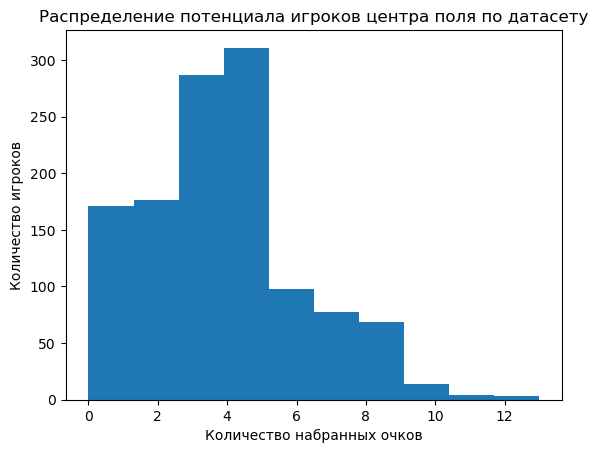

In [588]:
non_top_5['mid_counter'].plot(kind = 'hist')
plt.title('Распределение потенциала игроков центра поля по датасету')
plt.xlabel('Количество набранных очков')
plt.ylabel('Количество игроков')
plt.show()

## Список "талантливых" футболистов с высоким оборонительным потенциалом, прошедших уровень отбора по 8/10 показателям:

In [360]:
non_top_5['def_counter'] = 0
for i in range(len(non_top_5)):
    counter = 0
    if non_top_5.loc[i, 'TklWon'] >= top_5_def.loc[117, 'TklWon']:
        counter += 1
    if non_top_5.loc[i, 'TklDriPast'] <= top_5_def.loc[117, 'TklDriPast']:
        counter += 1
    if non_top_5.loc[i, 'TklDri%'] >= top_5_def.loc[117, 'TklDri%']:
        counter += 1
    if non_top_5.loc[i, 'Int'] >= top_5_def.loc[117, 'Int']:
        counter += 1
    if non_top_5.loc[i, 'Clr'] >= top_5_def.loc[117, 'Clr']:
        counter += 1
    if non_top_5.loc[i, 'Err'] <= top_5_def.loc[117, 'Err']:
        counter += 1
    if non_top_5.loc[i, 'BlkSh'] >= top_5_def.loc[117, 'BlkSh']:
        counter += 1
    if non_top_5.loc[i, 'AerWon%'] >= top_5_def.loc[117, 'AerWon%']:
        counter += 1
    if non_top_5.loc[i, 'PasTotCmp%'] >= top_5_def.loc[117, 'PasTotCmp%']:
        counter += 1
    if non_top_5.loc[i, 'PasProg'] >= top_5_def.loc[117, 'PasProg']:
        counter += 1
    non_top_5.loc[i, 'def_counter'] = counter
def_talents = non_top_5[['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts', 'Min', '90s', 'TklWon', 'TklDriPast', 'TklDri%', 'Int', 'Clr', 'Err', 'BlkSh', 'AerWon%', 'PasTotCmp%', 'PasProg', 'def_counter']]
def_talents = def_talents[def_talents['def_counter'] >= 8]
def_talents = def_talents.reset_index(drop=True)
def_talents.loc[len(def_talents)] = top_5_def.loc[len(top_5_def)-1]
def_talents

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,TklWon,TklDriPast,TklDri%,Int,Clr,Err,BlkSh,AerWon%,PasTotCmp%,PasProg,def_counter
0,Yeray Álvarez,ESP,DF,Athletic Club,La Liga,28,18,18,1565,17.4,0.80,0.23,77.8,2.13,3.74,0.00,0.63,57.40,81.90,6.21,8.0
1,César Azpilicueta,ESP,DF,Chelsea,Premier League,33,18,10,1023,11.4,1.32,0.35,78.9,1.23,3.60,0.00,0.35,59.50,80.60,4.74,8.0
2,Santiago Bueno,URU,DF,Girona,La Liga,24,20,20,1787,19.9,1.06,0.10,88.2,1.06,2.51,0.00,0.70,63.00,86.80,4.82,9.0
3,Jean-Charles Castelletto,CMR,DF,Nantes,Ligue 1,28,19,17,1469,16.3,1.04,0.43,66.7,2.27,3.44,0.00,0.67,68.60,82.60,3.62,8.0
4,Maximiliano Caufriez,BEL,DF,Clermont Foot,Ligue 1,25,16,16,1385,15.4,0.71,0.32,72.2,1.56,3.44,0.00,0.71,63.60,89.10,4.09,8.0
5,Fabien Centonze,FRA,DF,Nantes,Ligue 1,27,10,8,737,8.2,1.34,0.24,83.3,2.93,2.32,0.00,0.61,64.70,73.30,5.24,8.0
6,Julian Chabot,GER,DF,Köln,Bundesliga,25,6,6,486,5.4,1.85,0.37,81.8,1.85,8.52,0.00,1.48,71.00,83.10,2.04,8.0
7,Vlad Chiriche?,ROU,DF,Cremonese,Serie A,33,8,8,595,6.6,2.12,0.45,72.7,2.42,3.33,0.00,1.67,37.00,85.70,0.76,8.0
8,Flavius Daniliuc,AUT,DF,Salernitana,Serie A,21,13,11,1031,11.5,1.13,0.26,75.0,1.04,4.35,0.00,0.61,63.90,86.70,3.22,8.0
9,Sinaly Diomande,CIV,DF,Lyon,Ligue 1,21,11,10,892,9.9,1.11,0.40,77.8,2.63,3.13,0.10,0.51,66.70,86.10,6.36,9.0


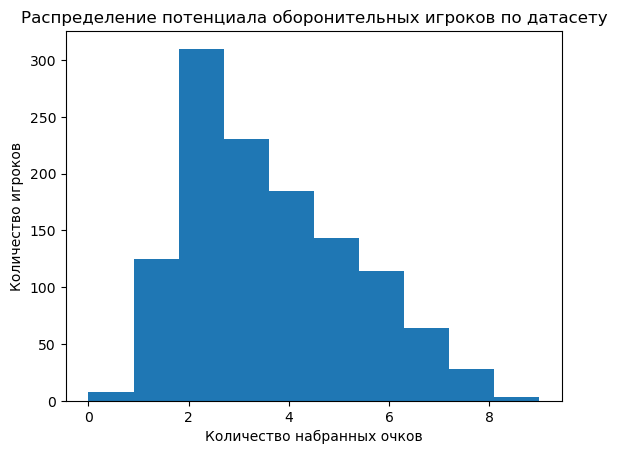

In [470]:
non_top_5['def_counter'].plot(kind = 'hist')
plt.title('Распределение потенциала оборонительных игроков по датасету')
plt.xlabel('Количество набранных очков')
plt.ylabel('Количество игроков')
plt.show()

## Успешные кейсы развития игроков из проведённой селекции

In [549]:
att_cases = pd.read_excel('att_cases.xlsx')
att_cases

,Name,Att_points,Mid_points,Def_points,Position,Progress
0,Jeremie Frimpong,8,3,1,RB/RWB,"Играя на позиции правого защитника, в сезоне 2022/2023 игрок совершил 15 голевых действий и занял с Байером 6-е место в Бундеслиге. Год спустя, будучи одним из ключевых игроков команды, стал чемпионом Германии в составе той же команды. По итогам сезона имеет статистику в 9 голов и 7 голевых передач, играя на той же позиции правого защитника."
1,Aleksandr Golovin,9,8,3,CM/CAM,"Находясь в системе футбольного клуба Монако, игрок прогрессирует на протяжении последних нескольких лет. В сезоне 2022/2023 забил 8 мячей и отдал 7 голевых передач, занял с командой 6-е место в чемпионате. На следующий год Монако с Головиным в составе стало серебряным призёром Лиги 1, сам игрок провёл некоторое время на поле в роли капитана и был признан лучшим игроком команды в сезоне."
2,Randal Kolo Muani,9,4,2,ST,"После успешного сезона 2022/2023 в Айнтрахте (15 голов и 11 голевых передач), игрок перешёл во французский клуб ПСЖ за €95 млн и помог парижанам стать чемпионами в последнем сезоне."
3,Aleix García,7,10,4,CM,"В сезоне 2022/2023 совершил 6 результативных действий и занял 10-е место в чемпионате, выступая за испанскую Жирону. По итогам следующего сезона занял с клубом 3-е место в лиге, отыграв в роли одного из ключевых игроков центра поля, совершив 9 результативных действий за 37 матчей. В начале июня 2024-го года перешёл в стан леверкузенского Байера - чемпиона Германии."
4,Declan Rice,4,9,8,CM/CDM,"С 2013-го года находился в академии лондонского клуба Вест Хэм. Проведя 10 лет в системе клуба, к сезону 2022/2023 игрок подошёл в статусе одного из ключевых игроков оборонительного плана и лидера центра поля в основной команде. По итогам сезона 2022/2023 Вест Хэм занял 14-е место в Английской Премьер-Лиге и выиграл титул чемпионов Лиги Конференций, после чего Деклан Райс перешёл в стан лондонского Арсенала за сумму в €116 млн и в прошедшем сезоне боролся за звание чемпиона Англии, однако команда уступила титул Манчестер Сити с разницей всего в 2 очка."


## Итоговая таблица с игроками

In [364]:
non_top_5

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%,att_counter,mid_counter,def_counter
0,1,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,...,0.0,0.00,0.0,4.86,0.34,1.19,22.2,0,2,0
1,2,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,...,0.0,0.00,0.0,6.64,2.18,1.23,64.0,4,5,7
2,3,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,...,0.0,0.00,0.0,8.14,0.93,1.05,47.1,4,6,3
3,5,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,...,0.0,0.00,0.0,6.51,0.31,0.39,44.4,3,7,5
4,10,Zakaria Aboukhlal,MAR,FWMF,Toulouse,Ligue 1,22,2000,22,17,...,0.0,0.00,0.0,4.43,0.42,1.32,24.1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,2676,Hakim Ziyech,MAR,FWMF,Chelsea,Premier League,29,1993,12,5,...,0.0,0.00,0.0,6.14,0.00,0.53,0.0,2,6,3
1206,2678,Simon Zoller,GER,FW,Bochum,Bundesliga,31,1991,18,16,...,0.0,0.07,0.0,3.26,0.96,1.26,43.3,2,2,2
1207,2681,Kurt Zouma,FRA,DF,West Ham,Premier League,28,1994,15,15,...,0.0,0.00,0.0,3.94,2.61,0.35,88.1,2,5,6
1208,2688,Milan ?uri?,BIH,FW,Hellas Verona,Serie A,32,1990,16,7,...,0.0,0.00,0.0,2.05,14.50,3.59,80.1,2,1,4


Выгрузка таблицы в эксель:

In [573]:
non_top_5.to_excel (r'~/Downloads/report_data.xlsx', index= False)

## Настройки отображения строк и столбцов

In [499]:
pd.set_option('display.max_columns', None)

In [362]:
pd.reset_option('display.max_columns')

In [503]:
pd.set_option('display.max_rows', None)

In [507]:
pd.reset_option('display.max_rows')

In [509]:
pd.set_option('display.max_colwidth', None)

In [551]:
pd.reset_option('display.max_colwidth', None)